In [1]:
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm
pd.options.display.max_columns = None
os.chdir('C:/Users/regru/Desktop/Springboard/Springboard_Project2')

In [2]:
#import dataset
df0 = pd.read_csv('telcom_churn.xls')

In [3]:
df0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df0.shape

(7043, 21)

In [5]:
df0.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df0.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


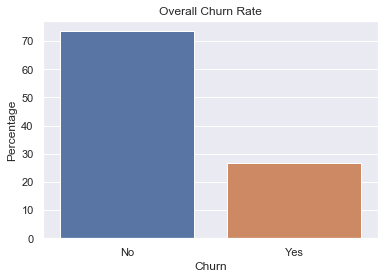

In [7]:
sns.set()
sns.barplot(x='Churn',y='Churn',data=df0, estimator=lambda x: len(x) / len(df0) * 100,orient="v")
plt.ylabel('Percentage')
plt.title('Overall Churn Rate')
plt.savefig('Graphs/churn_rate.png')
plt.show()

In [12]:
male = df0[df0.gender == 'Male']
female = df0[df0.gender == 'Female']
senior = df0[df0.SeniorCitizen == 1]
non_senior = df0[df0.SeniorCitizen == 0]
partner = df0[df0.Partner == 'Yes']
no_partner = df0[df0.Partner == 'No']
dependents = df0[df0.Dependents == 'Yes']
no_dependents = df0[df0.Dependents == 'No']
phone_service = df0[df0.PhoneService == 'Yes']
no_phone_service = df0[df0.PhoneService == 'No']
dsl = df0[df0.InternetService == 'DSL']
fiberoptic = df0[df0.InternetService == 'Fiber optic']
no_internet = df0[df0.InternetService == 'No']
secure = df0[df0.OnlineSecurity == 'Yes']
not_secure = df0[df0.OnlineSecurity == 'No']
backup = df0[df0.OnlineBackup == 'Yes']
no_backup = df0[df0.OnlineBackup == 'No']

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


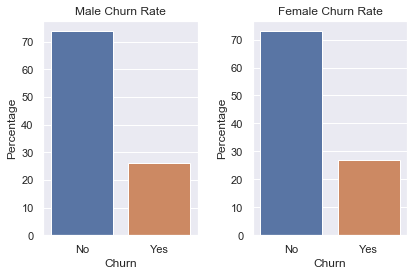

In [16]:
f, axes = plt.subplots(1, 2)
sns.barplot(x='Churn',y='Churn',data=male, estimator=lambda x: len(x) / len(male) * 100,orient="v",ax=axes[0]).set(ylabel='Percentage',title='Male Churn Rate')
sns.barplot(x='Churn',y='Churn',data=female, estimator=lambda x: len(x) / len(female) * 100,orient="v",ax=axes[1]).set(ylabel='Percentage',title='Female Churn Rate')
plt.tight_layout()
plt.savefig('Graphs/gender_churn.png')
plt.show()
#.set_ylabel('Percentage').set_title('Male Churn Rate')

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


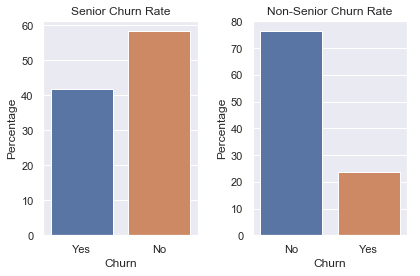

In [17]:
f, axes = plt.subplots(1, 2)
sns.barplot(x='Churn',y='Churn',data=senior, estimator=lambda x: len(x) / len(senior) * 100,orient="v",ax=axes[0]).set(ylabel='Percentage',title='Senior Churn Rate')
sns.barplot(x='Churn',y='Churn',data=non_senior, estimator=lambda x: len(x) / len(non_senior) * 100,orient="v",ax=axes[1]).set(ylabel='Percentage',title='Non-Senior Churn Rate')
plt.tight_layout()
plt.savefig('Graphs/senior_churn.png')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


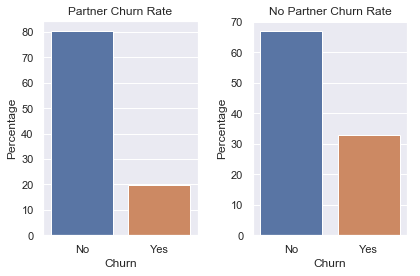

In [20]:
f, axes = plt.subplots(1, 2)
sns.barplot(x='Churn',y='Churn',data=partner, estimator=lambda x: len(x) / len(partner) * 100,orient="v",ax=axes[0]).set(ylabel='Percentage',title='Partner Churn Rate')
sns.barplot(x='Churn',y='Churn',data=no_partner, estimator=lambda x: len(x) / len(no_partner) * 100,orient="v",ax=axes[1]).set(ylabel='Percentage',title='No Partner Churn Rate')
plt.tight_layout()
plt.savefig('Graphs/partner_churn.png')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


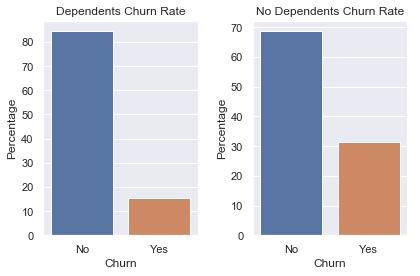

In [21]:
f, axes = plt.subplots(1, 2)
sns.barplot(x='Churn',y='Churn',data=dependents, estimator=lambda x: len(x) / len(dependents) * 100,orient="v",ax=axes[0]).set(ylabel='Percentage',title='Dependents Churn Rate')
sns.barplot(x='Churn',y='Churn',data=no_dependents, estimator=lambda x: len(x) / len(no_dependents) * 100,orient="v",ax=axes[1]).set(ylabel='Percentage',title='No Dependents Churn Rate')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('Graphs/partner_churn.png')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


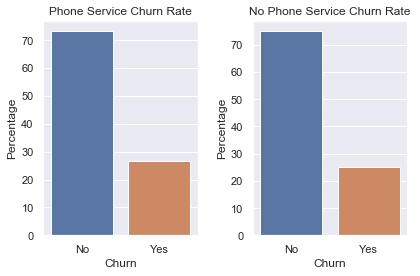

In [13]:
f, axes = plt.subplots(1, 2)
sns.barplot(x='Churn',y='Churn',data=phone_service, estimator=lambda x: len(x) / len(phone_service) * 100,orient="v",ax=axes[0]).set(ylabel='Percentage',title='Phone Service Churn Rate')
sns.barplot(x='Churn',y='Churn',data=no_phone_service, estimator=lambda x: len(x) / len(no_phone_service) * 100,orient="v",ax=axes[1]).set(ylabel='Percentage',title='No Phone Service Churn Rate')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('Graphs/phone_service_churn.png')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


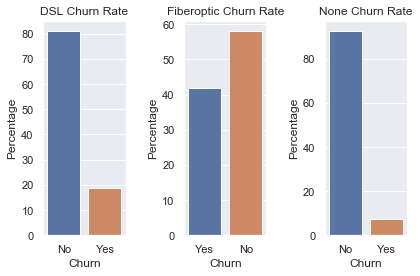

In [17]:
f, axes = plt.subplots(1, 3)
sns.barplot(x='Churn',y='Churn',data=dsl, estimator=lambda x: len(x) / len(dsl) * 100,orient="v",ax=axes[0]).set(ylabel='Percentage',title='DSL Churn Rate')
sns.barplot(x='Churn',y='Churn',data=fiberoptic, estimator=lambda x: len(x) / len(fiberoptic) * 100,orient="v",ax=axes[1]).set(ylabel='Percentage',title='Fiberoptic Churn Rate')
sns.barplot(x='Churn',y='Churn',data=no_internet, estimator=lambda x: len(x) / len(no_internet) * 100,orient="v",ax=axes[2]).set(ylabel='Percentage',title='None Churn Rate')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('Graphs/internet_churn.png')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


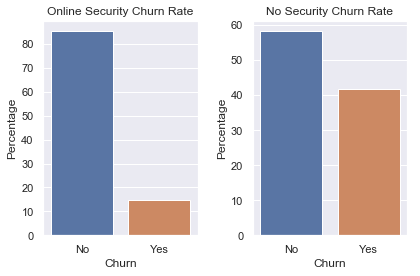

In [20]:
f, axes = plt.subplots(1, 2)
sns.barplot(x='Churn',y='Churn',data=secure, estimator=lambda x: len(x) / len(secure) * 100,orient="v",ax=axes[0]).set(ylabel='Percentage',title='Online Security Churn Rate')
sns.barplot(x='Churn',y='Churn',data=not_secure, estimator=lambda x: len(x) / len(not_secure) * 100,orient="v",ax=axes[1]).set(ylabel='Percentage',title='No Security Churn Rate')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('Graphs/security_churn.png')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


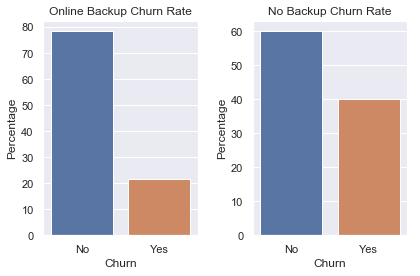

In [22]:
f, axes = plt.subplots(1, 2)
sns.barplot(x='Churn',y='Churn',data=backup, estimator=lambda x: len(x) / len(backup) * 100,orient="v",ax=axes[0]).set(ylabel='Percentage',title='Online Backup Churn Rate')
sns.barplot(x='Churn',y='Churn',data=no_backup, estimator=lambda x: len(x) / len(no_backup) * 100,orient="v",ax=axes[1]).set(ylabel='Percentage',title='No Backup Churn Rate')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('Graphs/backup_churn.png')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


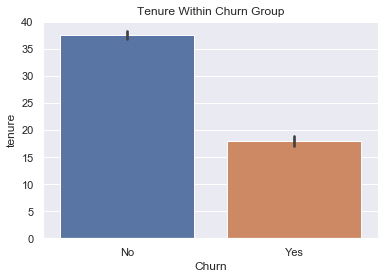

In [8]:
sns.barplot(x='Churn',y='tenure',data=df0)
plt.savefig('Graphs/tenure_churn.png')
plt.title('Tenure Within Churn Group')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


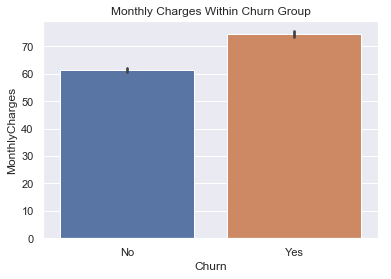

In [9]:
sns.barplot(x='Churn',y='MonthlyCharges',data=df0)
plt.savefig('Graphs/monthlycharge_churn.png')
plt.title('Monthly Charges Within Churn Group')
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\regru\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\regru\Anaconda

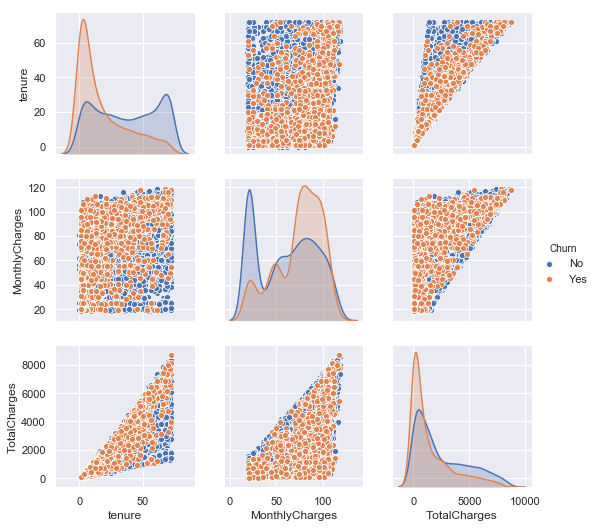

In [22]:
df0['TotalCharges'] = df0['TotalCharges'].convert_objects(convert_numeric=True)
sns.pairplot(df0 ,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

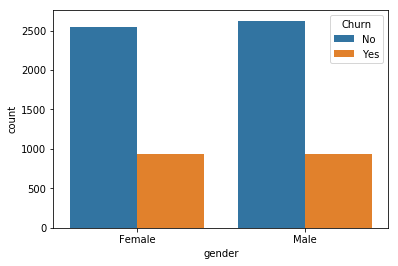

In [6]:
def categorical_graphs(label_colname, categorical_dataset):
    n_data_cols = len(categorical_dataset.columns)
    col_names = categorical_dataset.columns
    # prime numbers are greater than 1
    def determine_prime(n):
        if n == 2:
            return 1
        else:
            if n > 1:
               # check for factors
               for i in range(2,n):
                   if (n % i) == 0:
                       return 0
                   else:
                       return 1
            # if input number is less than
            # or equal to 1, it is not prime
            else:
               return 0
        
    # determine number of rows
    def n_rows(num_cols):
    num = num_cols
    if determine_prime(num) == 0:
        if ((num % 2) == 0) & (num <= 10):
           return num/2
        else:
           return num/3
    elif (determine_prime(num) == 1) & (num <= 3):
        return num
    elif (determine_prime(num) == 1) & (num > 3):
        return max(round((num+1)/3-.5,0),1)
    
    # determine number of cols
    def n_cols(df_ncols, n_rows):
    if df_ncols == 3:
        return 3
    else:
        return round(df_ncols/n_rows,0)
    
    prime = determine_prime(n_data_cols)
    nrows = n_rows(n_data_cols)
    ncols = n_cols(n_data_cols,nrows)
    plot_indices = 
    
    fig, ax =plt.subplots(nrows,ncols,figsize=(12,20))
    
    for feature in enumerate(col_names):
        sns.countplot(x=feature,hue=label_colname, data=categorical_dataset,ax=ax[][])
